In [1]:
import tensorflow as tf
import zipfile
import urllib.request
import matplotlib.pyplot as plt

In [2]:
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# --- Verifique se o diretório base existe, se não, crie ---
base_dir = 'content'
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

train_dir = os.path.join(base_dir, 'treinamento')
validation_dir = os.path.join(base_dir, 'teste')

# --- Verifique se os diretórios de treinamento existem, se não, crie ---
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

# Diretórios de treinamento
train_cats_dir = os.path.join(train_dir, 'Cats')
train_dogs_dir = os.path.join(train_dir, 'Dogs')

# --- Verifique se os diretórios de validação existem, se não, crie ---
if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)

# Diretórios de validação
validation_cats_dir = os.path.join(validation_dir, 'Cats')
validation_dogs_dir = os.path.join(validation_dir, 'Dogs')


In [4]:
# Geração de dados de treinamento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Geração de dados de validação
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 42 images belonging to 3 classes.
Found 17 images belonging to 3 classes.


In [5]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar a base convolucional
conv_base.trainable = False

# Adicionar novas camadas
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=2e-5), metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/100 ━━━━━━━━━━━━━━━━━━━━ 9:03 6s/step - accuracy: 0.0238 - loss: 1.7384     

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - accuracy: 0.0700 - loss: 1.3976 - val_accuracy: 0.4118 - val_loss: 0.5958
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 152ms/step - accuracy: 0.5005 - loss: -0.0130 - val_accuracy: 0.5882 - val_loss: -0.1741
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.5000 - loss: -0.5327 - val_accuracy: 0.5882 - val_loss: -0.6405
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.4971 - loss: -0.9766 - val_accuracy: 0.5882 - val_loss: -1.0171
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.4990 - loss: -1.4223 - val_accuracy: 0.5882 - val_loss: -1.3438
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 151ms/step - accuracy: 0.5036 - loss: -1.7201 - val_accuracy: 0.5882 - val_loss: -1.5748
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step - accuracy: 0.5000 - loss: -2.0056 - val_accuracy: 0.5882 - val_loss: -1.8684
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 154ms/step - accuracy: 0.5055 - loss: -

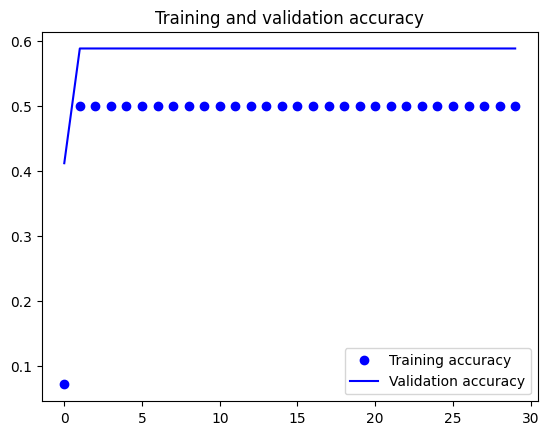

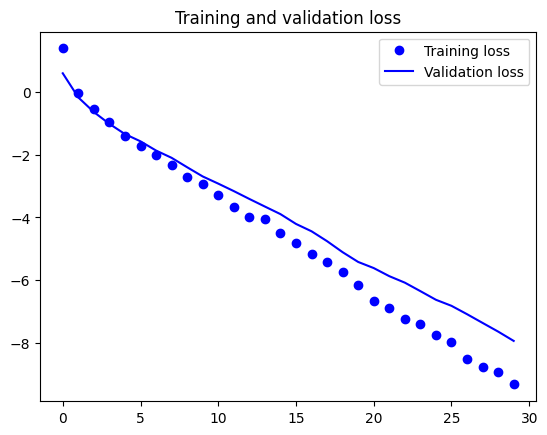

In [7]:
# Plotar os gráficos de precisão e perda
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()